# 5HDB Viz

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch

sys.path.append('../src')
from vae_lightning_utils import load_vae_model
from ours_lightning_utils import load_our_model
from dataset_utils import get_dataset


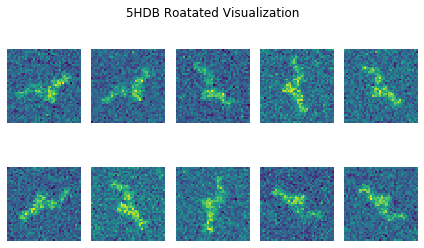

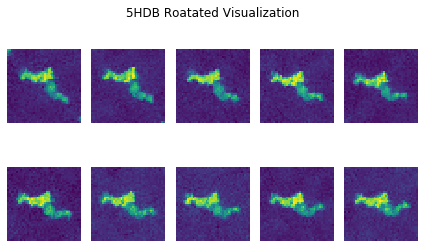

In [2]:
# Load dataset
train_loader, test_loader, image_shape = get_dataset('5hdb', 1, 0, data_base_dir='../data/')

# Visualize dataset
fig, axs = plt.subplots(2, 5)
for ax, i in zip(axs.flatten(), np.linspace(0, len(train_loader.dataset) - 1, 10).astype(int)):
    img, rot, img_rot = train_loader.dataset[i]
    ax.imshow(img.squeeze())
    ax.set_axis_off()
fig.suptitle("5HDB Roatated Visualization")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 5)
for ax, i in zip(axs.flatten(), np.linspace(0, len(train_loader.dataset) - 1, 10).astype(int)):
    img, rot, img_rot = train_loader.dataset[i]
    ax.imshow(img_rot.squeeze())
    ax.set_axis_off()
fig.suptitle("5HDB Roatated Visualization")
plt.tight_layout()
plt.show()


## Inference using VAE

In [3]:
# VAE
out_base_dir = '../output/vae_5hdb_20200619_132545'
vae_model = load_vae_model(out_base_dir, train_loader, test_loader, image_shape)
vae_model = vae_model.eval()

# Ours
ours_base_dir = '../output/ours_5hdb_20200626_150655'
our_model = load_our_model(ours_base_dir, train_loader, test_loader, image_shape)
our_model = our_model.eval()


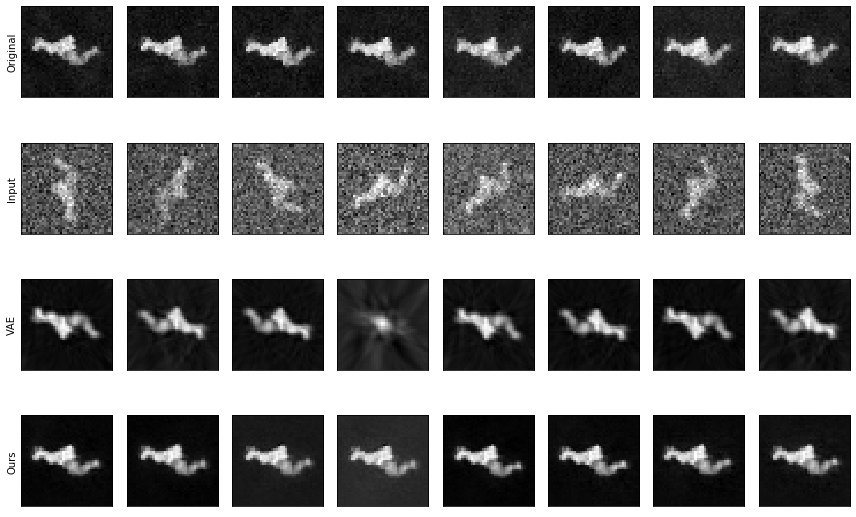

In [4]:
viz_num = 8

viz_idxs = np.linspace(0, len(test_loader.dataset) - 1, viz_num).astype(int)

w, h = plt.rcParams.get('figure.figsize')
fig, axs = plt.subplots(4, len(viz_idxs), figsize=(w * 2, h * 2), facecolor='w')

for i, idx in enumerate(viz_idxs):
    # Get input and visualize it
    imgs, rot, imgs_rot0 = test_loader.dataset[idx]
    ax = axs[0, i]
    ax.imshow(imgs_rot0.squeeze(), cmap='gray')
    ax = axs[1, i]
    ax.imshow(imgs.squeeze(), cmap='gray')

    # Inference vae
    imgs_vae = vae_model.forward(vae_model.x_coord, imgs, theta_input=0)[0].detach().numpy()
    ax = axs[2, i]
    ax.imshow(np.flip(imgs_vae.squeeze(),axis=1), cmap='gray')

    # Inference ours
    z_rot_input = torch.zeros(len(imgs), 1)  # Force the decoder to generate images with rotation zero
    gen_imgs, z_rot = our_model.forward(imgs, z_rot_input=z_rot_input)
    gen_imgs = gen_imgs.detach().numpy()
    ax = axs[3, i]
    ax.imshow(gen_imgs.squeeze(), cmap='gray')

[ax.set_xticks([]) for ax in axs.flatten()]
[ax.set_yticks([]) for ax in axs.flatten()]

axs[0, 0].set_ylabel('Original')
axs[1, 0].set_ylabel('Input')
axs[2, 0].set_ylabel('VAE')
axs[3, 0].set_ylabel('Ours')

plt.tight_layout()
plt.show()


## Verify dataset statistics

In [5]:
# calc numpy dataset stattistic
imgs = np.load('../data/5HDB/processed_train.npy')
print(imgs.mean(), imgs.std(), imgs.max(), imgs.min())

# Calc dataset mean and std
img_list = [img for img, _, _ in train_loader.dataset]
img_tensor = torch.cat(img_list, 0)
print(img_tensor.mean(), img_tensor.std(), img_tensor.max(), img_tensor.min())


0.9820243 2.3510475 14.401253 -5.6437025
tensor(0.9822) tensor(2.3510) tensor(16.0992) tensor(-8.7009)
